<a href="https://colab.research.google.com/github/jackson-gregoire/MachineLearningLearning/blob/main/random_walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

In [3]:
'''
  Random Walk implementation with pure python.
'''
def random_walk(n):
  x, y, dx, dy = 0,0,0,0
  x_cords, y_cords = [], []

  for i in range(n):
    (dx, dy) = random.choice([(0,1), (0,-1), (1,0), (-1, 0)])
    x += dx; y += dy
    x_cords.append(x); y_cords.append(y)

  return x_cords, y_cords

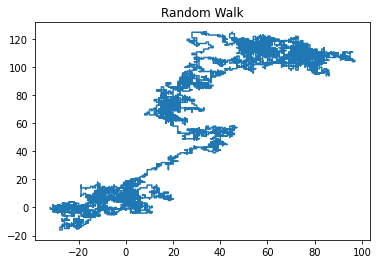

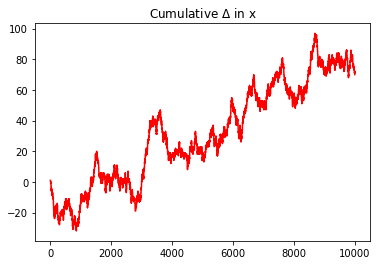

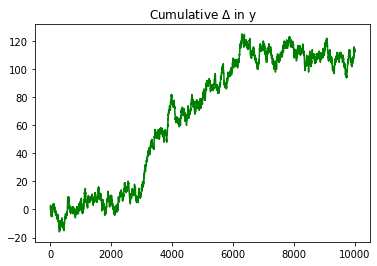

In [20]:
n = 10000
x, y = random_walk(n)

plt.plot(x, y)
plt.title("Random Walk")
plt.show()
plt.plot(range(0, n), x, color = 'red')
plt.title(r"Cumulative $\Delta$ in x")
plt.show()
plt.plot(range(0, n), y, color = 'green')
plt.title(r"Cumulative $\Delta$ in y")
plt.show()

In [ ]:
'''
  Random Walk implementation with numpy.
'''
def random_walk_np(n: int) -> list:
  # Starting at the origin
  xy = np.array([[0,0]])
  rng = np.random.default_rng()

  for i in range(n):
    # Generate a step in a random cardinal direction
    # Step assingment below allows for diagonal steps (both x,y can be non-zero)
    # step = np.reshape(np.random.choice([-1,0,1], 2), (1,2))
    # More of a game of life style, single cardinal direction
    step = rng.choice([[0,1],[0,-1],[1,0],[-1,0]])
    # print(f"Step {i+1}", step)
    xy = np.vstack((xy, step)) # Add this to the step list

  # Return the cumulative sum of each concurrent step
  return np.cumsum(xy, axis = 0)

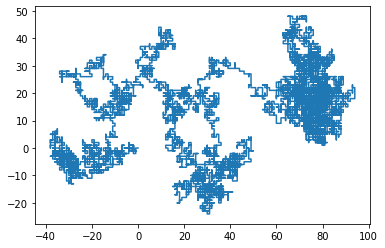

In [ ]:
n = 10000
cords = random_walk_np(n)
plt.plot(cords[0:, 0], cords[0:, 1])
plt.show()

In [ ]:
'''
  Not currently working!
  Testing animating the Random Walk.
'''
figure, ax = plt.subplots()
x_min, x_max = np.min(cords[0:, 0]), np.max(cords[0:, 0])
y_min, y_max = np.min(cords[0:, 1]), np.max(cords[0:, 1])
ax.set_xlim(x_min - 10, x_max + 10)
ax.set_ylim(y_min - 10, y_max + 10)

# ax.plot(cords[1:, 0], cords[1:, 1])

line, = ax.plot(0, 0)

def animate(i):
  line.set_data(cords[0:i, 0], cords[0:i, 1])
  return line,


anim = animation.FuncAnimation(figure, animate,
                                frames=np.arange(0, n, 1), interval=200)
plt.show()
